Здесь реализовал класс Логистической Регрессии, но не через -sum[ ylog(p)+(1-y)log(1-p) ], а через логарифмическую функцию потерь log[ 1+exp(-y<x,w>) ]. Здесь важна метка классов, и здесь она {-1, 1}, а не {0, 1} как в первом случае и как обычно дается в датасетах. Без регуляризации, но  графиком трейн тест лосса

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
np.array([1, 2, 3]) @ np.array([[1, 1], [1, 1], [1, 1]]) фиксация состояния для перезаключения договора

array([6, 6])

In [613]:
class MyLogReg:
    def __init__(self, lr=0.0001, n_iter=500):
        self.lr = lr
        self.n_iter = n_iter

    def sigmoid(self, h):
        return 1. / (1 + np.exp(-h))
    
    def logaddexp(self, h):
        return np.log(1 + np.exp(h))
        
    def fit(self, X, y, X_test=None, y_test=None):
        X = np.column_stack([np.ones(len(X)), X])
        self.w = np.zeros(X.shape[1])
        self.loss_history = []
        
        if not X_test is None:
                X_test = np.column_stack([np.ones(len(X_test)), X_test])
                self.test_loss_history = []
        
        for _ in range(self.n_iter):
            z = X @ self.w
            Q = self.logaddexp(-y*z).mean()
            self.loss_history.append(Q)

            if not X_test is None:
                T = self.logaddexp(-y_test*(X_test @ self.w)).mean()
                self.test_loss_history.append(T)

            self.w -= self.lr * (-y * self.sigmoid(-y*z)) @ X

    def predict(self, X):
        X = np.column_stack([np.ones(len(X)), X])
        return np.sign(X @ self.w)
    
    def predict_proba(self, X):
        X = np.column_stack([np.ones(len(X)), X])
        z = X @ self.w
        return self.sigmoid(z)
    

Здесеь стандартизация нужна, потому что иначе:
+ Коэфициенты несопоставимы друг другу
+ Градиенты по одним весам будут очень большими, по другим — маленькими и как следствие:
+ + Медленне сходимость (потому что для каждого признака нужен свой оптимальный lr, а у нас он один на всех)
+ + Средний лосс очень сильно колеблется (из-за резкого изменения вдоль одной оси весов модель сильно раскачивается)

In [626]:
from sklearn.preprocessing import StandardScaler
# np.random.seed(42)
dataset = load_breast_cancer()
dataset.target = np.where(dataset.target==0, -1, 1)
scaler = StandardScaler()
dataset.data = scaler.fit_transform(dataset.data)
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, train_size=0.7)

In [627]:
kop = MyLogReg()
kop.fit(X_train, y_train, X_test, y_test)
None

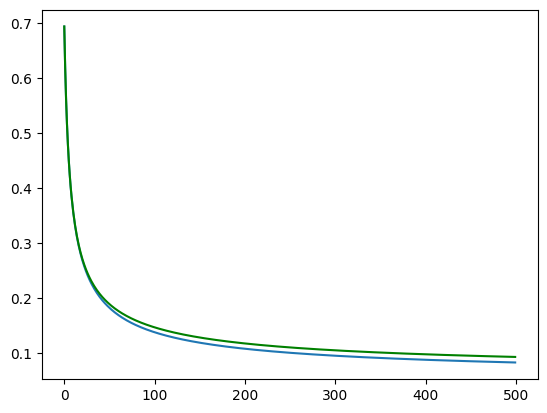

In [629]:
plt.plot(range(len(kop.loss_history)), kop.loss_history)
plt.plot(range(len(kop.test_loss_history)), kop.test_loss_history, c='g')
plt.show()

In [630]:
from sklearn.linear_model import LogisticRegression

pok = LogisticRegression(max_iter=500)
pok.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [631]:
y_test[y_test != kop.predict(X_test)], y_test[y_test != pok.predict(X_test)]

(array([-1,  1, -1, -1,  1]), array([-1,  1,  1, -1, -1,  1, -1]))

In [632]:
np.round(kop.predict_proba(X_test), 2) # P(y=1|X_test)

array([0.03, 0.99, 1.  , 0.09, 1.  , 0.01, 0.  , 0.9 , 0.  , 0.99, 0.94,
       0.99, 0.22, 0.02, 0.63, 0.96, 0.  , 0.  , 0.1 , 0.96, 1.  , 0.97,
       0.99, 0.99, 0.33, 0.03, 0.97, 0.77, 1.  , 0.01, 1.  , 0.99, 1.  ,
       1.  , 0.99, 0.98, 0.06, 0.83, 0.  , 0.  , 0.39, 0.82, 0.62, 1.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.57, 1.  , 0.99, 0.12, 0.01, 0.93,
       0.98, 0.  , 0.  , 0.  , 0.99, 1.  , 0.99, 0.27, 0.95, 0.89, 0.  ,
       0.06, 0.  , 0.94, 1.  , 0.97, 1.  , 0.  , 0.77, 0.52, 0.46, 0.5 ,
       0.  , 0.  , 0.92, 0.93, 1.  , 1.  , 0.86, 1.  , 1.  , 0.9 , 1.  ,
       0.96, 0.98, 1.  , 0.36, 0.  , 1.  , 0.96, 1.  , 0.  , 0.99, 0.54,
       0.96, 0.  , 1.  , 0.  , 0.94, 0.16, 0.97, 0.  , 0.96, 0.99, 0.  ,
       0.38, 0.97, 0.98, 0.92, 0.87, 0.95, 0.07, 0.01, 0.  , 0.38, 0.97,
       0.02, 0.  , 1.  , 1.  , 0.81, 0.03, 0.  , 1.  , 0.97, 1.  , 0.99,
       0.83, 0.95, 0.  , 1.  , 0.04, 0.86, 1.  , 0.03, 0.  , 0.  , 1.  ,
       0.92, 0.  , 0.93, 1.  , 0.  , 0.01, 0.8 , 1.

In [633]:
kop.w

array([ 0.36282531, -0.44902588, -0.48766265, -0.44325648, -0.45032753,
       -0.11304807, -0.07125182, -0.34849882, -0.42971414, -0.04336146,
        0.23837237, -0.44862011, -0.01461253, -0.39973536, -0.39466086,
       -0.00334869,  0.16614104,  0.09795658, -0.03935811,  0.18419001,
        0.19925912, -0.55024568, -0.58670003, -0.53387311, -0.52169866,
       -0.38627484, -0.24826561, -0.38950173, -0.49162988, -0.30220908,
       -0.20450042])

In [640]:
np.round(kop.loss_history, 2)

array([0.69, 0.62, 0.56, 0.52, 0.48, 0.45, 0.42, 0.4 , 0.38, 0.37, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.29, 0.28, 0.27, 0.27, 0.26,
       0.26, 0.25, 0.25, 0.24, 0.24, 0.24, 0.23, 0.23, 0.23, 0.22, 0.22,
       0.22, 0.21, 0.21, 0.21, 0.21, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.19,
       0.19, 0.19, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18,
       0.18, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16,
       0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.15, 0.15,
       0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
       0.15, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14,
       0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13,
       0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12,
       0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.